<a href="https://colab.research.google.com/github/sami10644/Data-Analysis-Project/blob/main/Salary_Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, 

# Libraries for data visualization
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 
# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# import the metrics class
from sklearn import metrics
# import stats for accuracy 
import statsmodels.api as sm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

df = pd.read_csv("adult.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
#replacing some special character columns names with proper names 
df.rename(columns={'capital.gain': 'capital gain', 'capital.loss': 'capital loss', 'native.country': 'country','hours.per.week': 'hours per week','marital.status': 'marital'}, inplace=True)
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital         32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital gain    32561 non-null  int64 
 11  capital loss    32561 non-null  int64 
 12  hours per week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [ ]:
df.sum(axis=0)

age                                                         1256257
workclass         ?Private?PrivatePrivatePrivatePrivateState-gov...
fnlwgt                                                   6179373392
education         HS-gradHS-gradSome-college7th-8thSome-collegeH...
education.num                                                328237
marital           WidowedWidowedWidowedDivorcedSeparatedDivorced...
occupation        ?Exec-managerial?Machine-op-inspctProf-special...
relationship      Not-in-familyNot-in-familyUnmarriedUnmarriedOw...
race              WhiteWhiteBlackWhiteWhiteWhiteWhiteWhiteWhiteW...
sex               FemaleFemaleFemaleFemaleFemaleFemaleMaleFemale...
capital gain                                               35089324
capital loss                                                2842700
hours per week                                              1316684
country           United-StatesUnited-StatesUnited-StatesUnited-...
income            <=50K<=50K<=50K<=50K<=50K<=50K

In [ ]:
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

In [ ]:
df.dropna(how='any',inplace=True)

In [ ]:
#running a loop of value_counts of each column to find out unique values. 
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- age ---
36    852
31    851
33    837
34    836
35    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64
---- workclass ---
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64
---- fnlwgt ---
203488     13
164190     12
121124     12
113364     12
123011     12
           ..
1268339     1
542265      1
312897      1
58447       1
125489      1
Name: fnlwgt, Length: 20263, dtype: int64
---- education ---
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64
---- educatio

In [ ]:
#dropping based on uniquness of data from the dataset 
df.drop(['education.num','age', 'hours per week', 'fnlwgt', 'capital gain','capital loss', 'country'], axis=1, inplace=True)

In [ ]:
#mapping the data into numerical data using map function
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [ ]:
df['sex'].astype('int', errors='ignore')

1        1
3        1
4        1
5        1
6        0
        ..
32556    0
32557    1
32558    0
32559    1
32560    0
Name: sex, Length: 30162, dtype: int64

In [ ]:
#gender
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1}).astype(int)
#race
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,                     'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)
#marital
df['marital'] = df['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)
#workclass
df['workclass'] = df['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)
#education
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)
#occupation
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)
#relationship
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

In [ ]:
#occupation
df['occupation'] = df['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)
#relationship
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

ValueError: ignored

In [ ]:
df.head()

,workclass,education,marital,occupation,relationship,race,sex,income
1,5,3,1,7,0,3,1,0
3,5,6,4,6,3,3,1,0
4,5,0,3,5,5,3,1,0
5,5,3,4,13,3,3,1,0
6,5,13,3,3,3,3,0,0


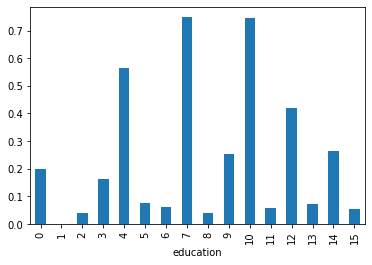

In [ ]:
df.groupby('education').income.mean().plot(kind='bar')

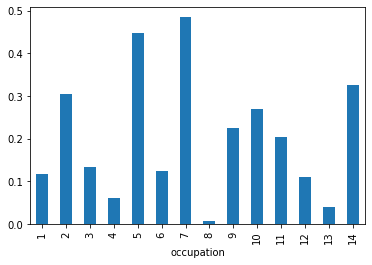

In [ ]:
df.groupby('occupation').income.mean().plot(kind='bar')

In [ ]:
df_x = pd.DataFrame(np.c_[df['relationship'], df['education'], df['race'],df['occupation'],df['sex'],df['marital'],df['workclass']], columns = ['relationship','education','race','occupation','sex','marital','workclass'])
#Y axis = Our dependent variable or the income of adult i.e Income
df_y = pd.DataFrame(df.income)

In [ ]:
df

,workclass,education,marital,occupation,relationship,race,sex,income
1,5,3,1,7,0,3,1,0
3,5,6,4,6,3,3,1,0
4,5,0,3,5,5,3,1,0
5,5,3,4,13,3,3,1,0
6,5,13,3,3,3,3,0,0
...,...,...,...,...,...,...,...,...
32556,5,0,5,14,0,3,0,0
32557,5,9,2,2,1,3,1,0
32558,5,3,2,6,4,3,0,1
32559,5,3,1,3,3,3,1,0


In [ ]:
df["relationship"]

1        0
3        3
4        5
5        3
6        3
        ..
32556    0
32557    1
32558    4
32559    3
32560    5
Name: relationship, Length: 30162, dtype: int64

In [ ]:
#Initialize the linear regression model
reg = LogisticRegression()
#Split the data into 77% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [ ]:
#Train our model with the training data
reg.fit(x_train, y_train)
#print our price predictions on our test data
y_pred = reg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
reg.predict([[1,7,3,7,0,2,0]])

array([1])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.750853928069118


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier



clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
max_depth=1, random_state=0).fit(x_train, y_train)
clf.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8036970062286518

In [ ]:
 from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier


 clf = AdaBoostClassifier(n_estimators=100)
 scores = cross_val_score(clf,x_train, y_train, cv=20)
 scores.mean()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.8241790796290311